In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm

## Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [2]:
train = pd.read_csv(r"D:\GreatLearning\Datasets\big-mart-sales-prediction\Train.csv")

In [3]:
test = pd.read_csv(r"D:\GreatLearning\Datasets\big-mart-sales-prediction\Test.csv")

In [4]:
data = pd.concat([train,test],sort = False, ignore_index=True)

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
answer = pd.read_csv(r"D:\GreatLearning\Datasets\big-mart-sales-prediction\Submission.csv")

In [7]:
answer.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [8]:
data.shape

(14204, 12)

In [9]:
train.shape

(8523, 12)

In [10]:
test.shape

(5681, 11)

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [12]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [13]:
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [14]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
data.Item_Fat_Content.replace(to_replace=['Low Fat','low fat', 'LF'],value=['Low Fat']*3,inplace=True)

In [17]:
data.Item_Fat_Content.replace(to_replace=['Regular','reg'],value=['Regular']*2,inplace=True)

In [18]:
#Univariate Analysis

In [19]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [20]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

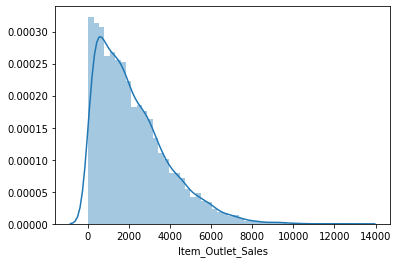

In [21]:
sns.distplot(train.Item_Outlet_Sales)

In [22]:
from scipy import stats as sm
sm.shapiro(train.Item_Outlet_Sales)

C:\Users\Navika\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9094116687774658, 0.0)

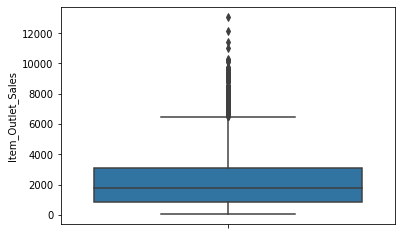

In [23]:
sns.boxplot(y=train.Item_Outlet_Sales)

In [24]:
#------------------------------------------

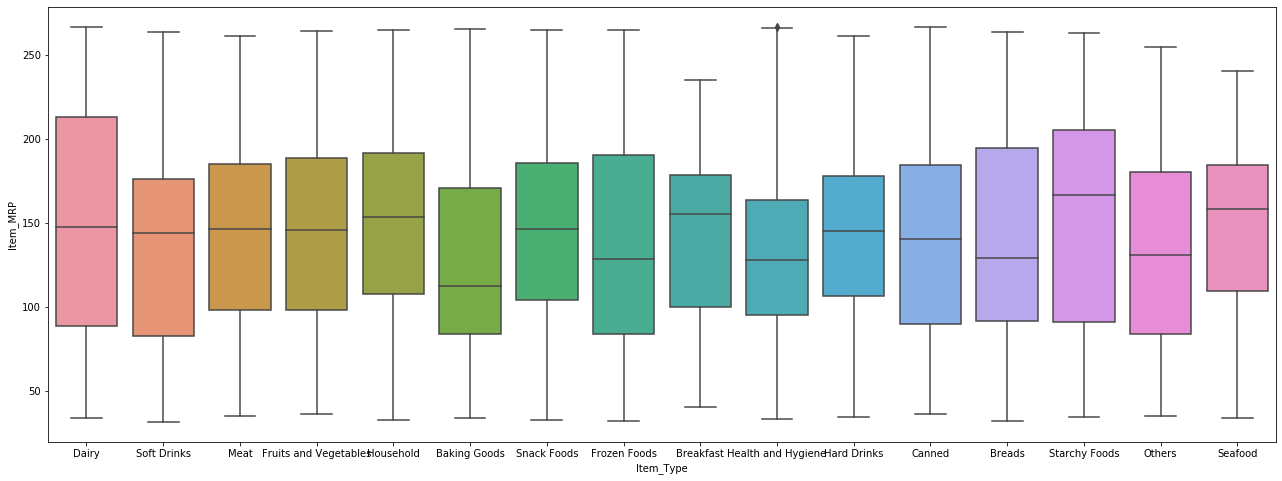

In [25]:
plt.figure(figsize=(22,8))
sns.boxplot(train.Item_Type,y=train.Item_MRP)

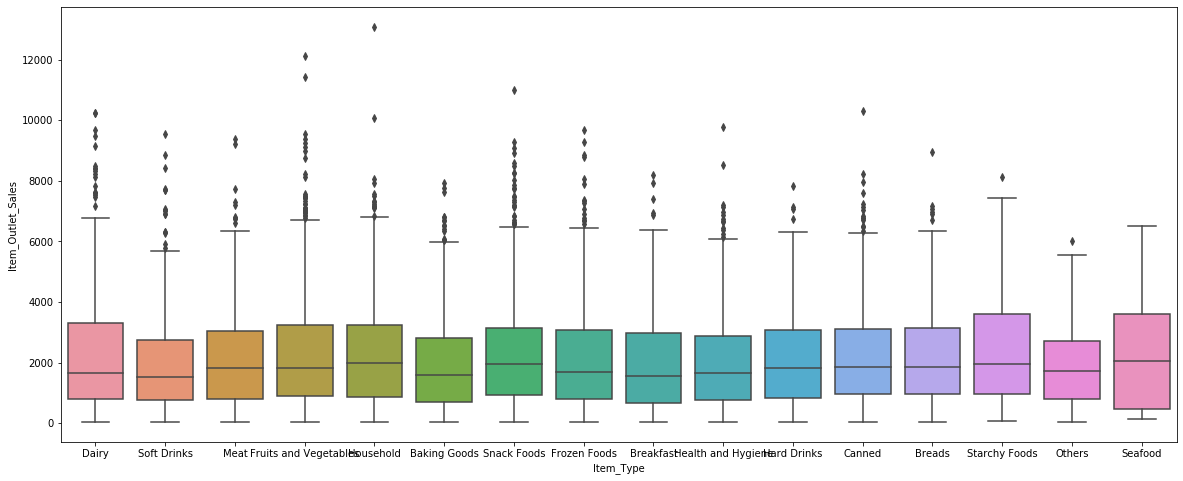

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(train.Item_Type,y=train.Item_Outlet_Sales)

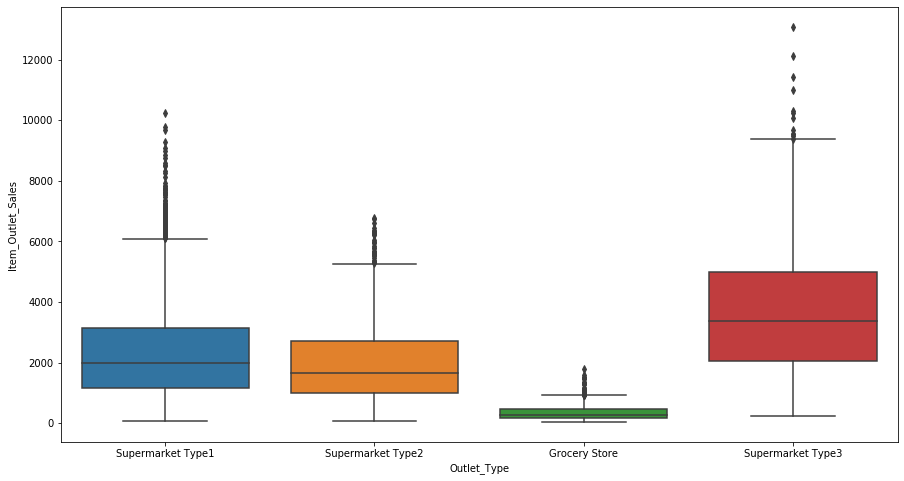

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Type,y=train.Item_Outlet_Sales)

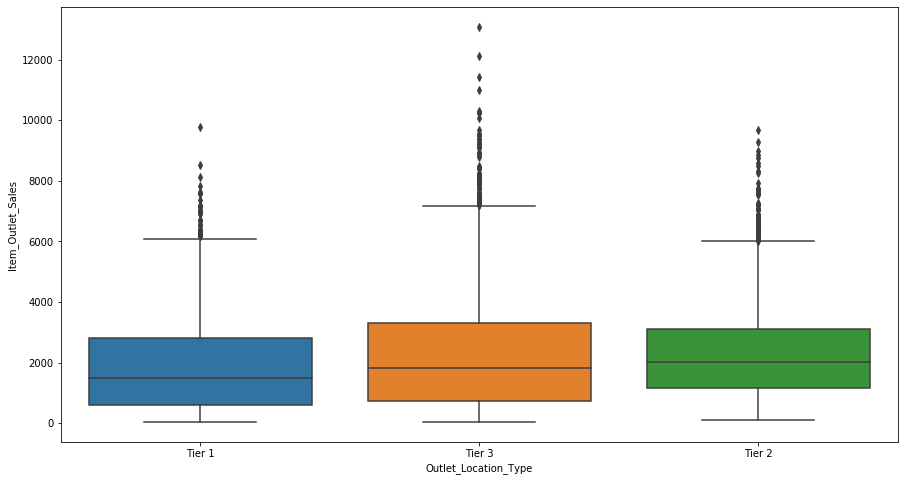

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Location_Type,y=train.Item_Outlet_Sales)

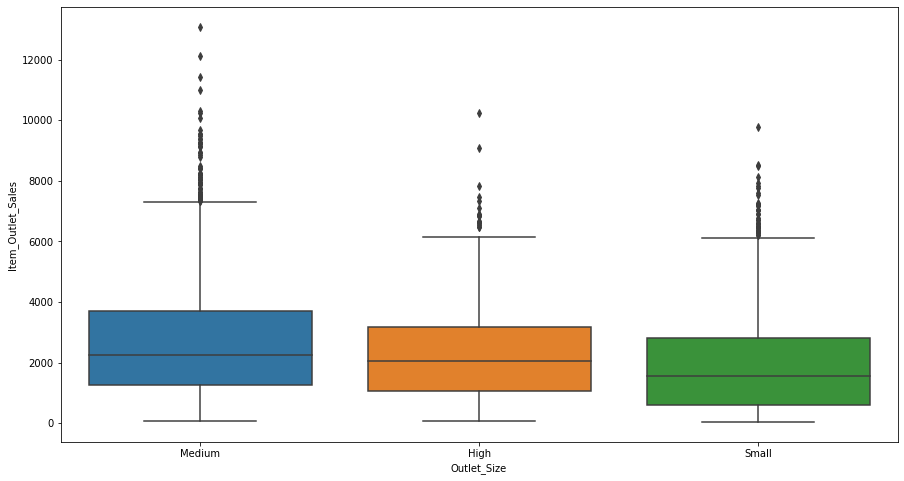

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Size,y=train.Item_Outlet_Sales)

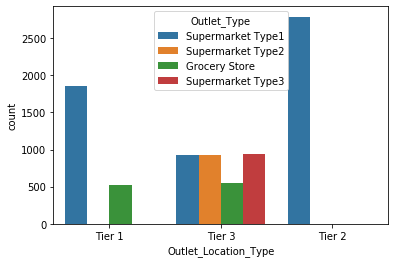

In [30]:
sns.countplot(train.Outlet_Location_Type,hue=train.Outlet_Type)

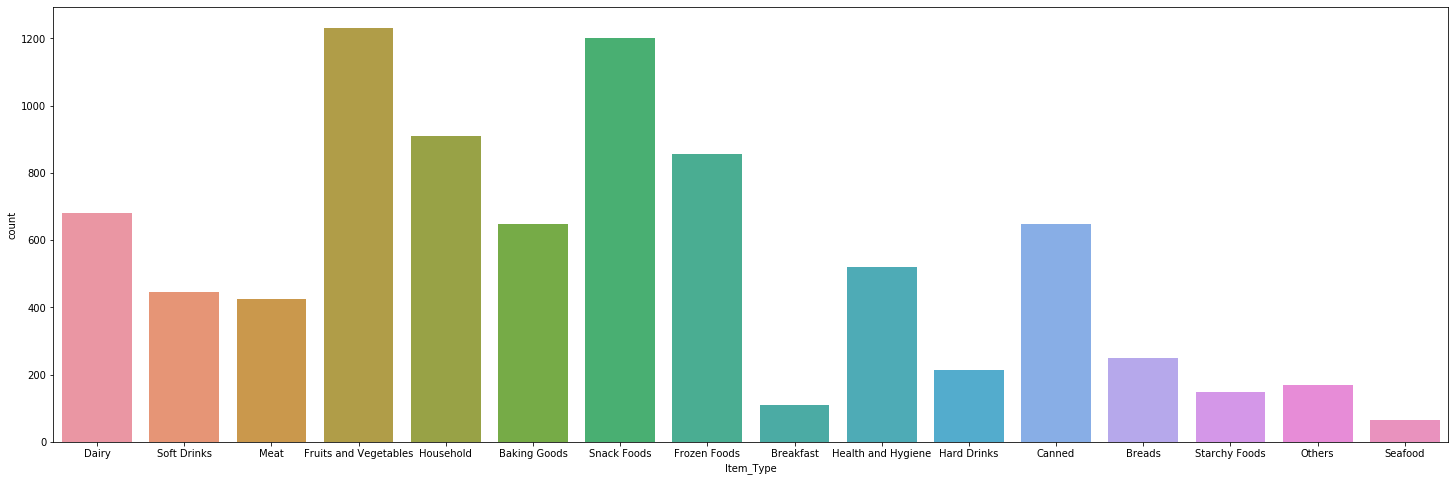

In [31]:
plt.figure(figsize=(25,8))
sns.countplot(train.Item_Type)

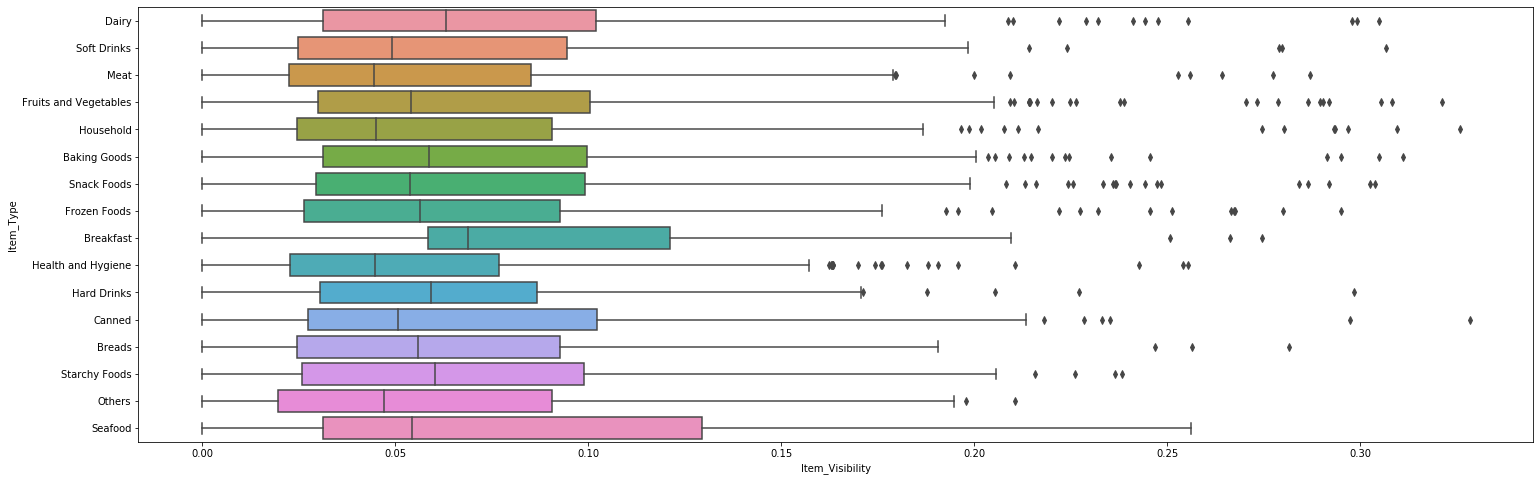

In [32]:
plt.figure(figsize=(25,8))
sns.boxplot(train.Item_Visibility,y=train.Item_Type)

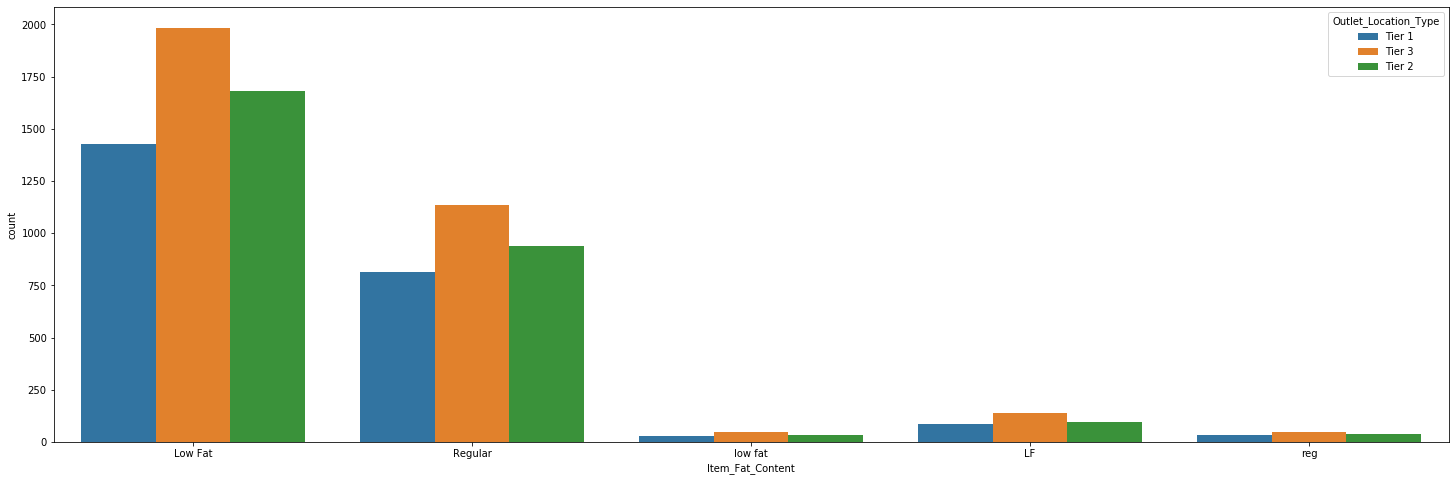

In [33]:
plt.figure(figsize=(25,8))
sns.countplot(train.Item_Fat_Content,hue=train.Outlet_Location_Type)

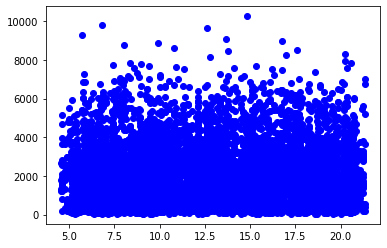

In [34]:
# Item Weight vs Sales
plt.scatter(train.Item_Weight, 
            train.Item_Outlet_Sales, color = "blue")

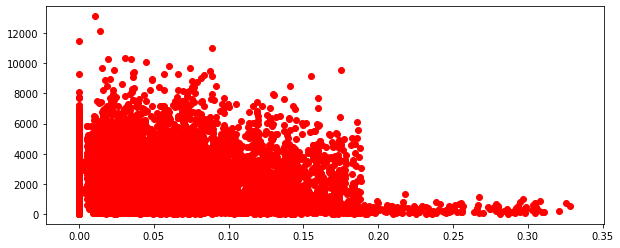

In [35]:
# Item Visibility vs Sales
plt.figure(figsize = [10,4])
plt.scatter(train.Item_Visibility, 
            train.Item_Outlet_Sales, color = "red")

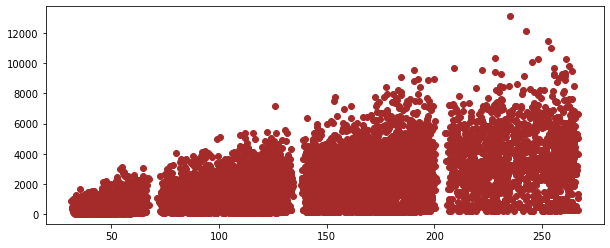

In [36]:
# Item MRP vs Sales
plt.figure(figsize = [10,4])
plt.scatter(x=train.Item_MRP, 
            y=train.Item_Outlet_Sales, color = "brown")

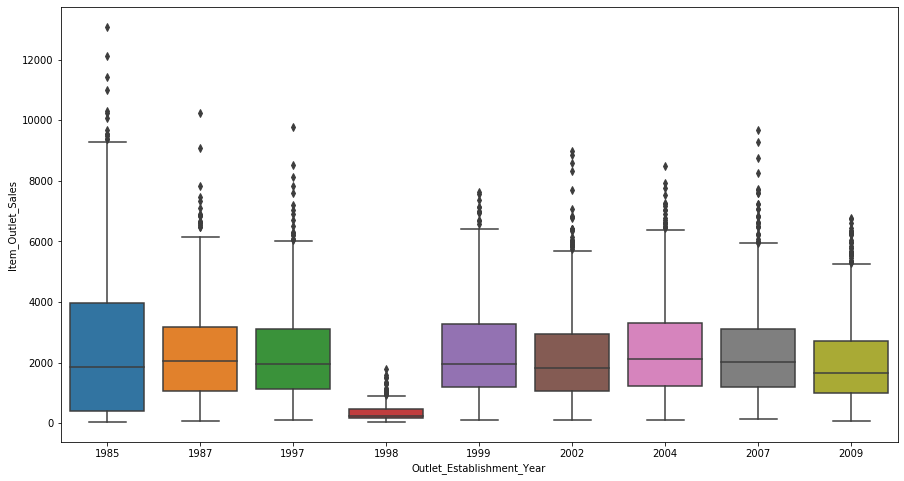

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Establishment_Year,y=train.Item_Outlet_Sales)

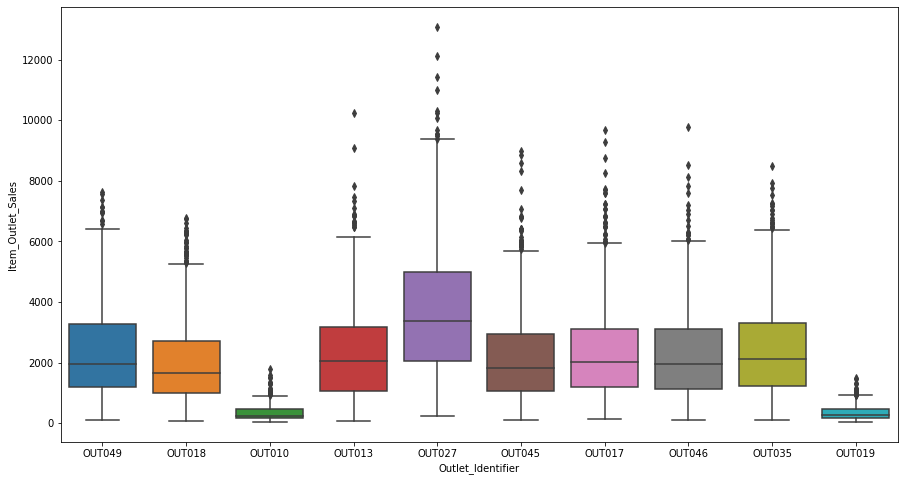

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Identifier,y=train.Item_Outlet_Sales)

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
count,316.000000,5089.000000,2889.000000,112.000000,117.000000
mean,2073.551928,2164.477336,2235.186702,2087.740737,1962.192268
std,1535.282582,1706.599391,1727.715941,1747.723146,1543.170658
min,40.613800,33.290000,33.955800,83.890800,37.950600
25%,729.051000,826.923600,860.213600,912.146000,798.960000
50%,1797.660000,1765.701600,1845.597600,1614.232100,1492.723600
75%,2990.107800,3057.353600,3219.808800,2753.415900,2821.660400
max,7503.566000,13086.964800,12117.560000,9562.219600,7833.802800


In [41]:
#----------------------

In [42]:
data[data.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [43]:
train.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [44]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:

data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean())) 
 

In [46]:
data[data['Item_Identifier']=='FDN15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.5,Low Fat,0.016760,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
759,FDN15,17.5,Low Fat,0.028009,Meat,141.718,OUT010,1998,NaN,Tier 3,Grocery Store,419.454
4817,FDN15,17.5,Low Fat,0.016720,Meat,139.918,OUT013,1987,High,Tier 3,Supermarket Type1,419.454
5074,FDN15,17.5,Low Fat,0.016802,Meat,138.518,OUT018,2009,Medium,Tier 3,Supermarket Type2,2376.906
6163,FDN15,17.5,Low Fat,0.016768,Meat,141.418,OUT045,2002,NaN,Tier 2,Supermarket Type1,1957.452
6952,FDN15,17.5,Low Fat,0.029299,Meat,140.318,OUT019,1985,Small,Tier 1,Grocery Store,139.818
8349,FDN15,17.5,Low Fat,0.016653,Meat,139.518,OUT027,1985,Medium,Tier 3,Supermarket Type3,2936.178
9682,FDN15,17.5,Low Fat,0.016731,Meat,139.018,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
12603,FDN15,17.5,Low Fat,0.016829,Meat,138.418,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
13358,FDN15,17.5,Low Fat,0.000000,Meat,140.418,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [47]:
data[data['Item_Identifier']=='FDX34']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
113,FDX34,6.195,Low Fat,0.071637,Snack Foods,121.7098,OUT027,1985,Medium,Tier 3,Supermarket Type3,4097.3332
2266,FDX34,6.195,Low Fat,0.072097,Snack Foods,119.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1,1205.0980
4709,FDX34,6.195,Low Fat,0.072132,Snack Foods,120.1098,OUT045,2002,NaN,Tier 2,Supermarket Type1,2892.2352
5803,FDX34,6.195,Low Fat,0.072279,Snack Foods,120.6098,OUT018,2009,Medium,Tier 3,Supermarket Type2,1807.6470
7243,FDX34,6.195,Low Fat,0.071986,Snack Foods,122.2098,OUT046,1997,Small,Tier 1,Supermarket Type1,1205.0980
8478,FDX34,6.195,Low Fat,0.071972,Snack Foods,121.3098,OUT035,2004,Small,Tier 2,Supermarket Type1,4820.3920
13571,FDX34,6.195,Low Fat,0.071926,Snack Foods,121.9098,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
13944,FDX34,6.195,Low Fat,0.072393,Snack Foods,122.2098,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [48]:
#data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [49]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

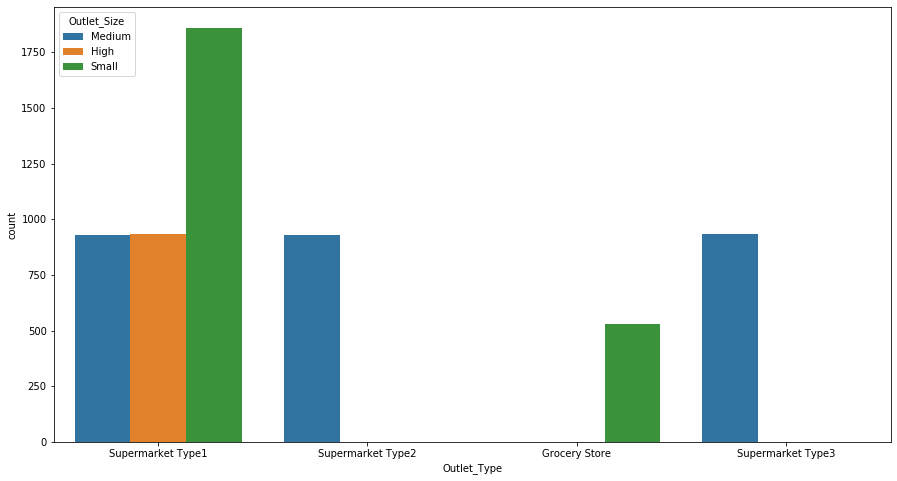

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(train.Outlet_Type,hue=train.Outlet_Size)

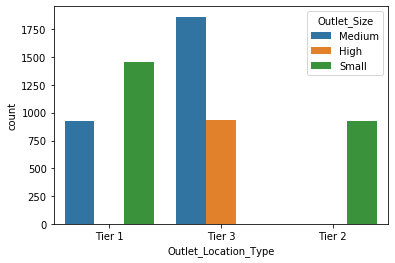

In [51]:
sns.countplot(train.Outlet_Location_Type,hue=train.Outlet_Size)

In [52]:
data.groupby(['Item_Type','Outlet_Location_Type'])['Outlet_Type'].value_counts()

Item_Type      Outlet_Location_Type  Outlet_Type      
Baking Goods   Tier 1                Supermarket Type1    238
                                     Grocery Store         67
               Tier 2                Supermarket Type1    352
               Tier 3                Supermarket Type1    119
                                     Supermarket Type2    119
                                     Supermarket Type3    119
                                     Grocery Store         72
Breads         Tier 1                Supermarket Type1     89
                                     Grocery Store         28
               Tier 2                Supermarket Type1    134
               Tier 3                Supermarket Type1     45
                                     Supermarket Type2     45
                                     Supermarket Type3     45
                                     Grocery Store         30
Breakfast      Tier 1                Supermarket Type1     40
               

In [53]:
data.groupby(['Item_Type','Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Item_Type      Outlet_Location_Type  Outlet_Type        Outlet_Size
Baking Goods   Tier 1                Grocery Store      Small           67
                                     Supermarket Type1  Medium         119
                                                        Small          119
               Tier 2                Supermarket Type1  Small          118
               Tier 3                Supermarket Type1  High           119
                                     Supermarket Type2  Medium         119
                                     Supermarket Type3  Medium         119
Breads         Tier 1                Grocery Store      Small           28
                                     Supermarket Type1  Medium          45
                                                        Small           44
               Tier 2                Supermarket Type1  Small           45
               Tier 3                Supermarket Type1  High            45
                                

In [54]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [55]:
data['Outlet_Size']=data.groupby(['Item_Type','Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].fillna(lambda x:x.stats.mode(x)[0][0])            

In [56]:
data.groupby(['Item_Type','Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Item_Type      Outlet_Location_Type  Outlet_Type        Outlet_Size                              
Baking Goods   Tier 1                Grocery Store      Small                                         67
                                     Supermarket Type1  Medium                                       119
                                                        Small                                        119
               Tier 2                Supermarket Type1  <function <lambda> at 0x000001921F6149D8>    234
                                                        Small                                        118
               Tier 3                Grocery Store      <function <lambda> at 0x000001921F6149D8>     72
                                     Supermarket Type1  High                                         119
                                     Supermarket Type2  Medium                                       119
                                     Supermarket Type3  Medium

In [57]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [58]:
data[(data.Outlet_Location_Type=='Tier 2')&(data.Outlet_Type=='Supermarket Type1')].isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            1856
dtype: int64

In [59]:
#data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean())) 
#data['Outlet_Size']=data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].transform(lambda x:x.fillna(x.mode()))

In [60]:
data[(data['Outlet_Type']=='Supermarket Type3')&(data['Outlet_Location_Type']=='Tier 3')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,20.200,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,6.385,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,15.250,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,6.215,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,17.500,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,12.600,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,20.200,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


In [61]:
#data[]

In [62]:
data.loc[(data.Outlet_Location_Type=='Tier 3')&(data.Outlet_Type=='Grocery Store'),"Outlet_Size"]='Small'

In [63]:
data.loc[(data['Outlet_Type']=='Supermarket Type1')&(data['Outlet_Location_Type']=='Tier 2'),"Outlet_Size"]='Small'

In [64]:
data[data['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [65]:
data.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [66]:
idlist = []
for i in data.Item_Identifier:
    idlist.append(str(i)[:2])
    
# combined.Item_Identifier.str[:3]

In [67]:
data["Item_Id_1"] = pd.Series(idlist)

In [68]:
data.Item_Id_1.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [69]:
idlist2 = []
for i in data.Item_Identifier:
    idlist2.append(str(i)[2:3])

In [70]:
data["Item_Id_2"] = pd.Series(idlist2)

In [71]:
data.Item_Id_2.unique()

array(['A', 'C', 'N', 'X', 'D', 'P', 'O', 'H', 'U', 'Y', 'S', 'F', 'B',
       'I', 'W', 'R', 'V', 'J', 'E', 'Z', 'K', 'L', 'M', 'G', 'Q', 'T'],
      dtype=object)

In [72]:
idlist3 = []
for i in data.Item_Identifier:
    idlist3.append(str(i)[3:])

In [73]:
data["Item_Id_3"] = pd.Series(idlist3)

In [74]:
data.Item_Id_3.unique()

array(['15', '01', '07', '19', '36', '10', '17', '28', '03', '32', '46',
       '49', '42', '11', '02', '22', '12', '30', '37', '06', '59', '51',
       '14', '38', '33', '23', '29', '20', '34', '43', '50', '39', '05',
       '40', '13', '18', '21', '54', '35', '26', '27', '09', '45', '58',
       '48', '04', '25', '55', '44', '41', '56', '57', '47', '60', '52',
       '16', '53', '31', '24', '08'], dtype=object)

In [75]:
data.Item_Identifier.nunique()

1559

In [76]:
data.Item_Weight.nunique()

628

In [77]:
8523/628

13.571656050955413

In [78]:
train.shape

(8523, 12)

In [79]:
#data['Weight_ID'] = data.Item_Weight.apply(weight_id)

In [80]:
#data.groupby('Item_Id')['Weight_ID'].value_counts()

In [81]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Id_1                       0
Item_Id_2                       0
Item_Id_3                       0
dtype: int64

In [82]:
#data.columns

In [83]:
#data['Outlet_Establishment_Year'].value_counts()

In [84]:
#train['Outlet_Establishment_Year'].dtype

In [85]:
#data['Year_Group'] = data.Outlet_Establishment_Year.apply(Year_Group)

In [86]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('object')

In [87]:
data.loc[(data.Item_MRP > 150) & (data.Item_MRP < 170) ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id_1,Item_Id_2,Item_Id_3
24,FDR28,13.850,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250,FD,R,28
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384,NC,P,05
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,Small,Tier 2,Supermarket Type1,4815.0656,NC,P,18
68,DRH37,17.600,Low Fat,0.041701,Soft Drinks,164.8526,OUT045,2002,Small,Tier 2,Supermarket Type1,2302.3364,DR,H,37
72,FDH35,18.250,Low Fat,0.000000,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728,FD,H,35
86,FDZ55,6.055,Low Fat,0.025404,Fruits and Vegetables,160.9920,OUT035,2004,Small,Tier 2,Supermarket Type1,2716.4640,FD,Z,55
87,FDQ49,20.200,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230,FD,Q,49
100,FDT28,13.300,Low Fat,0.063695,Frozen Foods,151.0708,OUT045,2002,Small,Tier 2,Supermarket Type1,1805.6496,FD,T,28
106,FDA47,10.500,Regular,0.116577,Baking Goods,163.1210,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310,FD,A,47
121,DRJ13,12.650,Low Fat,0.063018,Soft Drinks,159.0578,OUT045,2002,Small,Tier 2,Supermarket Type1,2085.9514,DR,J,13


In [88]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Id_1                       0
Item_Id_2                       0
Item_Id_3                       0
dtype: int64

In [89]:
#------------------------

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Id_1                    14204 non-null object
Item_Id_2                    14204 non-null object
Item_Id_3                    14204 non-null object
dtypes: float64(4), object(11)
memory usage: 1.6+ MB


In [91]:
traindata = data.loc[0:8522]
testdata = data.loc[8523:]

In [92]:
traindata.shape

(8523, 15)

In [93]:
testdata.shape

(5681, 15)

In [94]:
traindata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id_1,Item_Id_2,Item_Id_3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,A,15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,C,01
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,N,15
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,X,07
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,D,19


In [95]:
traindata.drop(['Item_Identifier'],axis=1,inplace=True)

C:\Users\Navika\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [96]:
traindata.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Id_1', 'Item_Id_2', 'Item_Id_3'],
      dtype='object')

In [97]:
testdata.drop(['Item_Identifier'],axis=1,inplace=True)

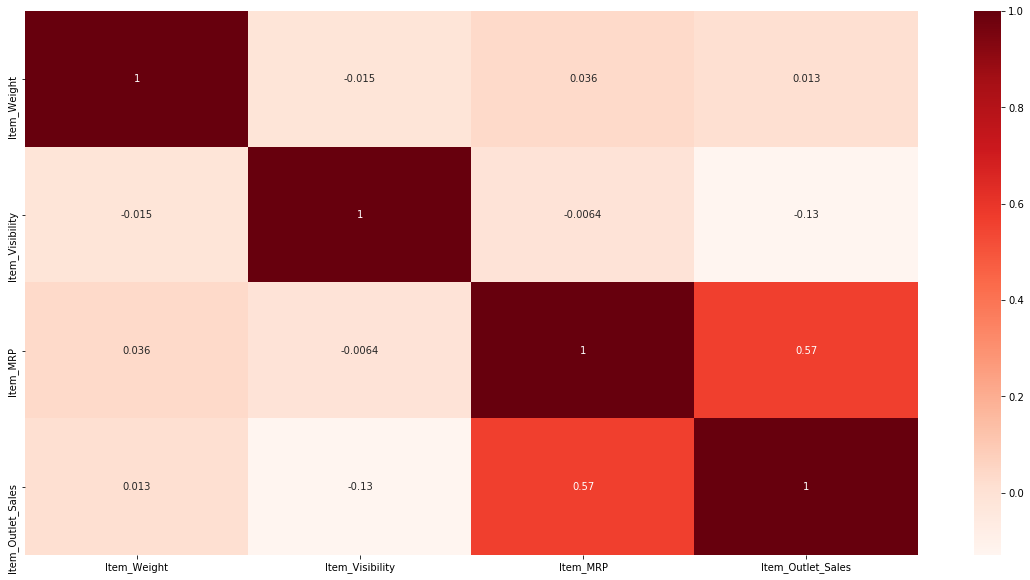

In [98]:
plt.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [99]:
#--------------------

In [100]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

data['Item_Weight'] = label_encoder.fit_transform(data['Item_Weight'])
data['Item_MRP'] = label_encoder.fit_transform(data['Item_MRP'])
data['Item_Visibility'] = label_encoder.fit_transform(data['Item_Visibility'])

In [101]:
traindummy = pd.get_dummies(traindata)

In [102]:
testdummy = pd.get_dummies(testdata)

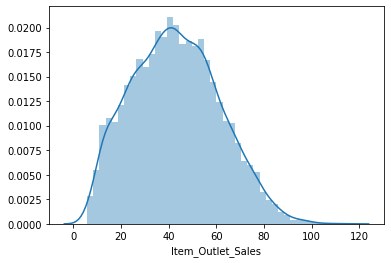

In [103]:
sns.distplot(traindummy.Item_Outlet_Sales**0.5)

In [104]:
traindummy = traindummy.transform(lambda x: (x**0.5))

In [105]:
testdummy = testdummy.transform(lambda x: (x**0.5))

In [106]:
traindummy.shape

(8523, 140)

In [107]:
testdummy.shape

(5681, 140)

In [108]:
for x in traindummy.columns:
    if(x not in testdummy.columns):
        print(x)

In [109]:
#Upper_limit = 3101.296400 + 1.5 * (3101.296400-834.247400)

In [110]:
#Upper_limit

In [111]:
#newtrain = newtrain[newtrain['Item_Outlet_Sales']<=Upper_limit]

In [112]:
traindummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 140 entries, Item_Weight to Item_Id_3_60
dtypes: float64(140)
memory usage: 9.1 MB


In [113]:
traindummy.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned',
       ...
       'Item_Id_3_51', 'Item_Id_3_52', 'Item_Id_3_53', 'Item_Id_3_54',
       'Item_Id_3_55', 'Item_Id_3_56', 'Item_Id_3_57', 'Item_Id_3_58',
       'Item_Id_3_59', 'Item_Id_3_60'],
      dtype='object', length=140)

In [114]:
testdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 8523 to 14203
Columns: 140 entries, Item_Weight to Item_Id_3_60
dtypes: float64(140)
memory usage: 6.1 MB


In [115]:
testdummy.isnull().sum()

Item_Weight                           0
Item_Visibility                       0
Item_MRP                              0
Item_Outlet_Sales                  5681
Item_Fat_Content_Low Fat              0
Item_Fat_Content_Regular              0
Item_Type_Baking Goods                0
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                 0
Item_Type_Soft Drinks                 0
Item_Type_Starchy Foods               0
Outlet_Identifier_OUT010              0
Outlet_Identifier_OUT013              0
Outlet_Identifier_OUT017              0


In [116]:
#--------------

In [117]:
testdummy.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [118]:
x = traindummy.drop(['Item_Outlet_Sales'],axis=1)
y = traindummy['Item_Outlet_Sales']

In [119]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state = 123)

In [120]:
# Building the first model with all the features
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression()

# fit
from sklearn.metrics import r2_score
pred = lm.fit(xtrain,ytrain).predict(xtest)

In [121]:
lm.score(xtrain,ytrain)

0.6686864443162595

In [122]:
lm.score(xtest,ytest)

0.6721827391959019

In [123]:
print(r2_score(y_true=ytest, y_pred=pred))

0.6721827391959019


In [124]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred)
lr_rmse_score=np.sqrt(mse)
print(lr_rmse_score)

10.548703069707901


In [125]:
import statsmodels.api as sm
X_constant = sm.add_constant(xtest)
model = sm.OLS(ytest, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

C:\Users\Navika\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     33.14
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:36:09   Log-Likelihood:                -6355.4
No. Observations:                1705   AIC:                         1.294e+04
Df Residuals:                    1591   BIC:                         1.356e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.7332      0.601     -1.219      0.223      -1.913       0.447
Item_Weight                        -0.0867      0.404     -0.214      0.830      -0.880       0.707
Item_Visibility                    -2.4002      2.565     -0.936      0.349      -7.431       2.630
Item_MRP                            3.7263      0.097     38.291      0.000       3.535       3.917
Item_Fat_Content_Low Fat           -0.8641      0.417     -2.070      0.039      -1.683      -0.045
Item_Fat_Content_Regular            0.1309      0.446      0.293      0.769      -0.745       1.006
Item_Type_Baking Goods             -0.5315      2.264     -0.235      0.814      -4.972       3.909
Item_Type_Breads                    0.7188      2.636      0.273      0.785      -4.452       5.889
Item_Type_Breakfast                -0.5522      2.818     -0.196      0.845      -6.080       4.976
Item_Type_Canned                   -0.4461      1.666     -0.268      0.789      -3.714       2.822
Item_Type_Dairy                    -1.6613      1.811     -0.918      0.359      -5.213       1.890
Item_Type_Frozen Foods              2.0017      2.735      0.732      0.464      -3.364       7.367
Item_Type_Fruits and Vegetables    -1.3956      2.019     -0.691      0.490      -5.356       2.565
Item_Type_Hard Drinks               4.0561      3.441      1.179      0.239      -2.693      10.805
Item_Type_Health and Hygiene        1.4679      2.157      0.680      0.496      -2.764       5.700
Item_Type_Household                 0.1330      1.423      0.093      0.926      -2.659       2.925
Item_Type_Meat                     -1.4528      2.504     -0.580      0.562      -6.365       3.459
Item_Type_Others                   -0.5034      1.965     -0.256      0.798      -4.359       3.352
Item_Type_Seafood                  -4.2971      3.309     -1.298      0.194     -10.788       2.194
Item_Type_Snack Foods              -3.6933      2.226     -1.659      0.097      -8.059       0.672
Item_Type_Soft Drinks               3.5926      3.059      1.174      0.240      -2.408       9.593
Item_Type_Starchy Foods             1.8301      2.581      0.709      0.478      -3.232       6.892
Outlet_Identifier_OUT010           -4.5304      0.297    -15.258      0.000      -5.113      -3.948
Outlet_Identifier_OUT013           -0.5435      0.221     -2.462      0.014      -0.976      -0.110
Outlet_Identifier_OUT017            1.0872      0.341      3.186      0.001       0.418       1.756
Outlet_Identifier_OUT018           -1.1671      0.242     -4.819      0.000      -1.642      -0.692
Outlet_Identifier_OUT019           -5.7477      0.351    -16.355      0.000      -6.437      -5.058
Outlet_Identifier_OUT027            6.1287      0.237     25.806      0.000       5

In [126]:
sns.set(style = 'whitegrid')

residuals = model.resid
residuals

4532    -4.042910
186      4.850708
7557   -21.306911
6308    -2.264473
7297     3.535987
2711    -9.554108
7374     1.595360
714    -10.406078
2886    -2.906981
7559    -3.565813
6568    23.798139
7176    -4.329452
6320     3.907744
8489     9.619278
426     10.575184
5509   -11.382509
8297    -0.621817
1796     0.648067
6929     6.858241
1173    13.086350
2895    -2.848302
2633    -4.532027
878     -8.790443
8196   -20.644527
7974    -6.904708
3494    21.053260
1831    -4.263952
2134   -26.245166
5444     8.836009
1012    22.883819
          ...    
3585    -7.931346
5243     5.291692
6420    15.840252
2453    -6.813101
6575     0.761005
374      2.847340
4031     5.945784
3249    -5.631531
4881    -0.144525
3241     4.715285
11       2.358984
8478    19.029656
4369   -16.157897
271    -11.925697
7744   -10.660983
1254    25.855352
5703    -5.545066
2139    -7.100779
6278     8.442202
3973    -1.077927
6574    -0.540487
1074    16.371860
1085     8.612519
3746   -14.487705
1878     4

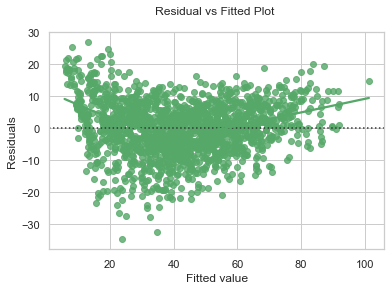

In [127]:
ax = sns.residplot(ytest, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

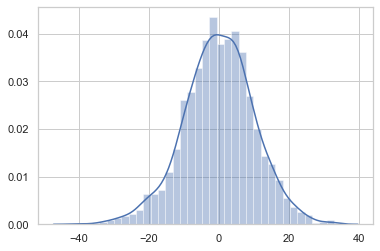

In [128]:
sns.distplot(residuals)

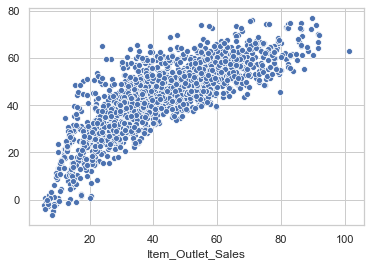

In [129]:
sns.scatterplot(ytest, pred)

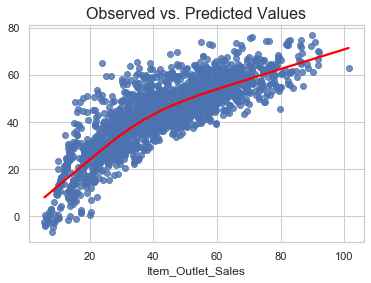

In [130]:
sns.regplot(x=ytest, y=pred, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel='Predicted'
plt.ylabel='Observed'

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_rf=rf.predict(xtest)

C:\Users\Navika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [132]:
print(r2_score(y_true=ytest, y_pred=pred_rf))
print(f'R^2 score:{rf.score(xtrain,ytrain)}')
print(f'R^2 score:{rf.score(xtest,ytest)}')

0.613914185280967
R^2 score:0.9307496728741033
R^2 score:0.613914185280967


In [133]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred_rf)
lr_rmse_score=np.sqrt(mse)
print(lr_rmse_score)

11.447880357044497


In [134]:
import xgboost as xgb

In [135]:
from xgboost.sklearn import XGBRegressor 
xgb=XGBRegressor() 
preds_xgb=xgb.fit(xtrain,ytrain).predict(xtest)

C:\Users\Navika\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:36:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [136]:
print(r2_score(y_true=ytest, y_pred=preds_xgb))
print(f'R^2 score:{xgb.score(xtrain,ytrain)}')
print(f'R^2 score:{xgb.score(xtest,ytest)}')

0.6827342625576154
R^2 score:0.7013651452907956
R^2 score:0.6827342625576154


In [137]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,preds_xgb)
lr_rmse_score=np.sqrt(mse)
print(lr_rmse_score)

10.377547887166381


In [138]:
testdummy.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy',
       ...
       'Item_Id_3_51', 'Item_Id_3_52', 'Item_Id_3_53', 'Item_Id_3_54',
       'Item_Id_3_55', 'Item_Id_3_56', 'Item_Id_3_57', 'Item_Id_3_58',
       'Item_Id_3_59', 'Item_Id_3_60'],
      dtype='object', length=139)

In [139]:
from xgboost.sklearn import XGBRegressor 
xgb=XGBRegressor() 
preds_xgb2=xgb.fit(xtrain,ytrain).predict(testdummy)

C:\Users\Navika\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:36:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


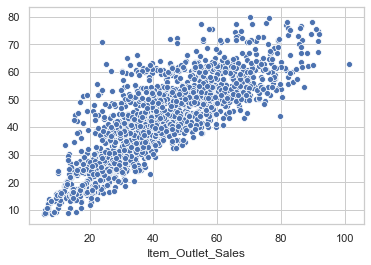

In [140]:
sns.scatterplot(ytest, preds_xgb)

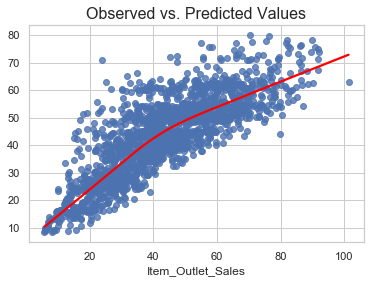

In [141]:
sns.regplot(x=ytest, y=preds_xgb, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel='Predicted'
plt.ylabel='Observed'


In [142]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
pred_gbm=gbm.fit(xtrain,ytrain).predict(xtest)

In [143]:
print(r2_score(ytest, pred_gbm))
print(f'R^2 score:{gbm.score(xtrain,ytrain)}')
print(f'R^2 score:{gbm.score(xtest,ytest)}')

0.6812076098782718
R^2 score:0.702894586559407
R^2 score:0.6812076098782718


In [144]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred_gbm)
lr_rmse_score=np.sqrt(mse)
print(lr_rmse_score)

10.402485812206976


# Since we got the least rmse error score of 10.37 with the extreme gradient boosting

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
pred_gbm2=gbm.fit(xtrain,ytrain).predict(testdummy)


In [146]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":((pred_gbm2)**2)})

In [147]:
solution.to_csv("GBM Model Navika6.csv", index = False) #1153 for Xtreme Gradient Boost
#solution.to_csv("GBM Model Navika6.csv", index = False) #1170 for Random Forest Tuning

In [148]:
cd

C:\Users\Navika


In [149]:
'''# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline'''

'# Import function to create training and test set splits\nfrom sklearn.model_selection import train_test_split\n# Import function to automatically create polynomial features! \nfrom sklearn.preprocessing import PolynomialFeatures\n# Import Linear Regression and a regularized regression function\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.linear_model import LassoCV\n# Finally, import function to make a machine learning pipeline\nfrom sklearn.pipeline import make_pipeline'

In [150]:
'''# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 2
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)'''

'# Alpha (regularization strength) of LASSO regression\nlasso_eps = 0.0001\nlasso_nalpha=20\nlasso_iter=5\n# Min and max degree of polynomials features to consider\ndegree_min = 2\ndegree_max = 2\n# Test/train split\nX_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)\n# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)\nfor degree in range(degree_min,degree_max+1):\n    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,\nnormalize=True,cv=5))\n    model.fit(X_train,y_train)\n    test_pred = np.array(model.predict(X_test))\n    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))\n    test_score = model.score(X_test,y_test)'